In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = "assets/flower/train"

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(224, 224),
  )

Found 1020 files belonging to 17 classes.
Using 918 files for training.


In [3]:
dataset_path = "assets/flower/train"

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  )

Found 1020 files belonging to 17 classes.
Using 102 files for validation.


In [4]:
class_names = val_ds.class_names
print(len(class_names))

17


In [126]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
model = models.Sequential([
    layers.Rescaling(1./255,  input_shape=(224, 224,3)),
    layers.Conv2D(32, 3, strides=2, activation="relu", padding="same"),
    # layers.MaxPooling2D(),
    layers.Conv2D(64,3, strides=2, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, strides=1, activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(17, activation="softmax"),
])

In [19]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=20)
model.save('weights/flower.h5')

Epoch 1/20


29/29 [==============================] - 15s 433ms/step - loss: 2.6627 - accuracy: 0.1198 - val_loss: 2.1206 - val_accuracy: 0.2745
Epoch 2/20
29/29 [==============================] - 12s 401ms/step - loss: 1.9642 - accuracy: 0.3279 - val_loss: 1.7350 - val_accuracy: 0.3824
Epoch 3/20
29/29 [==============================] - 12s 395ms/step - loss: 1.3705 - accuracy: 0.5479 - val_loss: 1.5872 - val_accuracy: 0.4902
Epoch 4/20
29/29 [==============================] - 12s 397ms/step - loss: 1.0712 - accuracy: 0.6460 - val_loss: 1.4344 - val_accuracy: 0.5098
Epoch 5/20
29/29 [==============================] - 12s 404ms/step - loss: 0.7178 - accuracy: 0.7734 - val_loss: 1.3886 - val_accuracy: 0.6078
Epoch 6/20
29/29 [==============================] - 13s 422ms/step - loss: 0.3905 - accuracy: 0.8660 - val_loss: 1.6542 - val_accuracy: 0.5784
Epoch 7/20
29/29 [==============================] - 13s 443ms/step - loss: 0.2038 - accuracy: 0.9390 - val_loss: 1.5550 - val_accuracy: 0.6373
Epoch 8/20

In [20]:
Y_true = []
Y_pred = []

for images, labels in val_ds:
    for image in images:
        # X.append(image)                    # append tensor
        image = np.expand_dims(image, axis=0) 
        prediction=model.predict(image)
        Y_true.append(np.argmax(prediction))
        #X.append(image.numpy())           # append numpy.array
        #X.append(image.numpy().tolist())  # append list
    for label in labels:
        # Y.append(label)                    # append tensor
        #Y.append(label.numpy())           # append numpy.array
        Y_pred.append(label.numpy().tolist())  # append list
print(f'Y_true:  {Y_true}\nY_pred: {Y_pred}')

1/1 [==============================] - 0s 28ms/step
Y_true:  [8, 15, 6, 11, 13, 9, 11, 7, 15, 2, 2, 16, 10, 6, 2, 15, 1, 8, 7, 4, 12, 0, 7, 10, 7, 4, 7, 12, 13, 0, 2, 3, 5, 11, 15, 8, 3, 16, 2, 3, 14, 0, 12, 5, 12, 9, 0, 16, 0, 7, 16, 2, 4, 1, 16, 14, 2, 6, 15, 6, 5, 6, 13, 11, 7, 16, 13, 12, 8, 3, 9, 10, 3, 8, 0, 7, 6, 13, 6, 3, 14, 12, 11, 6, 3, 10, 14, 15, 13, 14, 14, 9, 9, 6, 3, 6, 16, 1, 14, 2, 9, 14]
Y_pred: [8, 1, 6, 8, 13, 8, 16, 5, 7, 1, 2, 16, 10, 6, 2, 15, 1, 14, 7, 4, 8, 4, 7, 10, 7, 0, 7, 11, 13, 0, 5, 1, 5, 11, 13, 8, 1, 6, 4, 16, 14, 12, 12, 5, 4, 9, 12, 16, 0, 3, 6, 2, 4, 1, 16, 14, 2, 6, 1, 16, 2, 6, 13, 9, 1, 16, 13, 12, 0, 3, 9, 10, 2, 9, 0, 5, 6, 13, 6, 15, 14, 10, 10, 6, 3, 12, 14, 3, 13, 14, 14, 9, 9, 6, 3, 12, 6, 3, 14, 2, 9, 9]


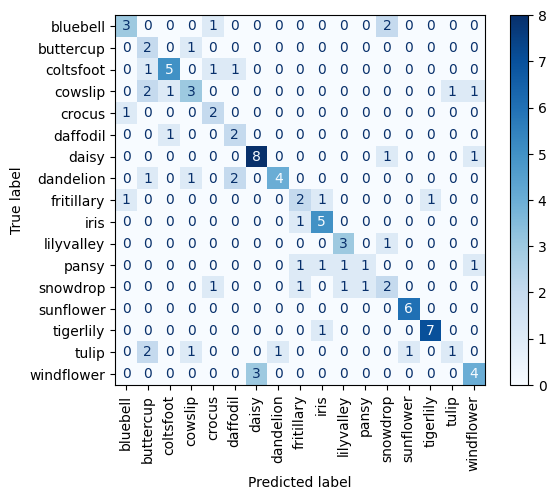

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels =val_ds.class_names

cm = confusion_matrix(Y_true, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues,xticks_rotation=90)
plt.show()

# Augmentation

In [22]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(factor=(-0.2,0.2)),
    layers.RandomZoom(0.1),
  ]
)

In [28]:
aug_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255,  input_shape=(224, 224,3)),
    layers.Conv2D(64, kernel_size=(3,3), strides=1, activation="relu", padding="same"),
    layers.Conv2D(64,kernel_size=(3,3), strides=1, activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(128, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.Conv2D(128, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(256, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.Conv2D(256, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.Conv2D(256, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(512, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.Conv2D(512, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.Conv2D(512, kernel_size=(3,3), strides=1,padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(17, activation="softmax"),
])

In [ ]:
aug_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

history = aug_model.fit(train_ds, validation_data=val_ds, epochs=20)
aug_model.save('weights/flower_aug.h5')

In [8]:
Y_true = []
Y_pred = []

for images, labels in val_ds:
    for image in images:
        # X.append(image)                    # append tensor
        image = np.expand_dims(image, axis=0) 
        prediction=aug_model.predict(image)
        Y_true.append(np.argmax(prediction))
        #X.append(image.numpy())           # append numpy.array
        #X.append(image.numpy().tolist())  # append list
    for label in labels:
        # Y.append(label)                    # append tensor
        #Y.append(label.numpy())           # append numpy.array
        Y_pred.append(label.numpy().tolist())  # append list
print(f'Y_true:  {Y_true}\nY_pred: {Y_pred}')

1/1 [==============================] - 0s 28ms/step
Y_true:  [16, 14, 10, 12, 7, 9, 7, 2, 8, 16, 7, 6, 16, 12, 2, 2, 10, 2, 13, 7, 9, 1, 13, 0, 2, 2, 9, 2, 0, 7, 9, 10, 14, 7, 8, 14, 7, 2, 7, 0, 13, 14, 0, 3, 9, 5, 11, 6, 15, 7, 16, 2, 12, 4, 5, 6, 12, 16, 12, 16, 9, 4, 0, 16, 10, 3, 12, 3, 6, 6, 13, 6, 9, 2, 5, 16, 1, 2, 14, 9, 8, 2, 7, 5, 12, 0, 9, 4, 6, 12, 6, 1, 6, 4, 8, 12, 14, 2, 6, 13, 6, 5]
Y_pred: [16, 14, 10, 8, 7, 9, 7, 2, 8, 12, 1, 6, 16, 4, 2, 5, 12, 13, 13, 3, 9, 1, 13, 0, 3, 2, 9, 2, 0, 1, 9, 10, 14, 1, 8, 14, 7, 3, 7, 0, 13, 14, 0, 3, 9, 5, 11, 6, 7, 1, 16, 2, 12, 4, 5, 6, 12, 10, 11, 16, 14, 4, 0, 16, 10, 3, 12, 15, 6, 6, 13, 6, 14, 2, 5, 16, 1, 1, 14, 9, 8, 5, 3, 15, 12, 9, 9, 4, 6, 10, 6, 1, 6, 4, 8, 16, 14, 2, 6, 13, 6, 13]


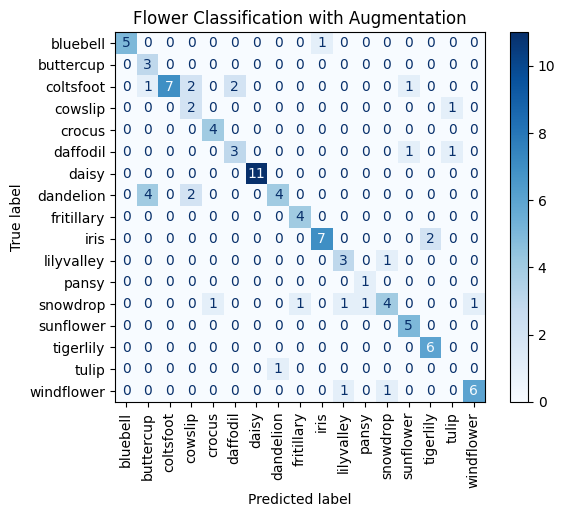

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels =val_ds.class_names

cm = confusion_matrix(Y_true, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues,xticks_rotation=90)
plt.title("Flower Classification with Augmentation")
plt.savefig('output/confusionmatric_floweraug.jpg')
plt.show()

In [17]:
import cv2
labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
model11 = tf.keras.models.load_model('weights/flower_aug.h5')


user_image = cv2.imread('gol.jpg')
user_image = cv2.resize(user_image, (224,224))
print(np.max(user_image))
user_image = np.array(user_image)/255
print(np.max(user_image))
user_image = np.expand_dims(user_image, axis=0) 
result = aug_model.predict(user_image)
out = np.argmax(result)
out

255
1.0
1/1 [==============================] - 0s 24ms/step


12